In [1]:
import glob
from tqdm import tqdm
root_path = '/data/szr207/dataset/ArqMath/jsons/questions'
import os
# files = [f for f in glob.glob(root_path + "**/*.jsonl", recursive=True)]

In [4]:
import jsonlines
import re
list_a = []
X_title = []
full_meta = [] 
with jsonlines.open(os.path.join(root_path,'all.ques.jsonl')) as reader:
        for obj in tqdm(reader):
            if obj['body']:
                obj['body'] = re.sub('<[^<]+?>', '',  obj['body'])
                obj['title'] = re.sub('<[^<]+?>', '',  obj['title'])
            list_a.append(obj['title']+'. '+obj['body'])
#             X_title.append(str(obj['post_id'])+': '+obj['title'])
            full_meta.append(obj)

1029449it [01:13, 14098.36it/s]


In [5]:
from bert_serving.client import BertClient
bc = BertClient()  # ip address of the GPU machine
ques_emb = bc.encode(list_a)

/data/szr207/conda/envs/faiss/lib/python3.6/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=512" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  '- or, start a new server with a larger "max_seq_len"' % self.length_limit)


In [6]:
import numpy as np
np.save('ques_bert.npy', ques_emb)


In [5]:
import faiss     
import numpy as np

xb = np.load('ques_bert.npy')
d = 1024
index = faiss.IndexFlatL2(d)   
print(index.is_trained)
index.add(xb)      
print(index.ntotal)
k = 5                          
# D, I = index.search(xb[:20], k)

k = 10                    # we want to see 4 nearest neighbors
D, I = index.search(xb[30:40], k)
for i in I:
    for j in i:
        print(X_title[j])
    print("================")

True
1029449
120: Why is 1 not a prime number?
1593008: Why is epsilon not a rational number?
539174: Is zero a prime number?
997294: How is it true that zero is neither a positive number nor a negative number?
1894159: How to check if a large number is prime?
2668224: Why  2 is a prime number since it has different representation than other primes?
1003466: Why is one the only positive number that is neither prime nor composite?
735044: Why is the Legendre symbol not defined for p = 2 (even prime)?
1694435: Prove that 2003 is prime.
1500292: "14 is no prime number iff 14 is an odd number" (true or false?)
123: Real world uses of hyperbolic trigonometric functions
1721177: Database of hypergeometric functions
2939161: Proof for hyperbolic trigonometric identities
2284627: How to evaluate inverse trigonometric functions in exponents?
2264875: Solution for the trigonometric-linear function
1227601: Geometric interpretation of hyperbolic functions and the hyperbolic angle/argument
1972254

## Cluster Viz

In [75]:
from sklearn.cluster import MiniBatchKMeans

k = 50
size = 50000
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X[:size])
y = y_pred

In [76]:
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=40, verbose=1)
X_embedded = tsne.fit_transform(X[:size])

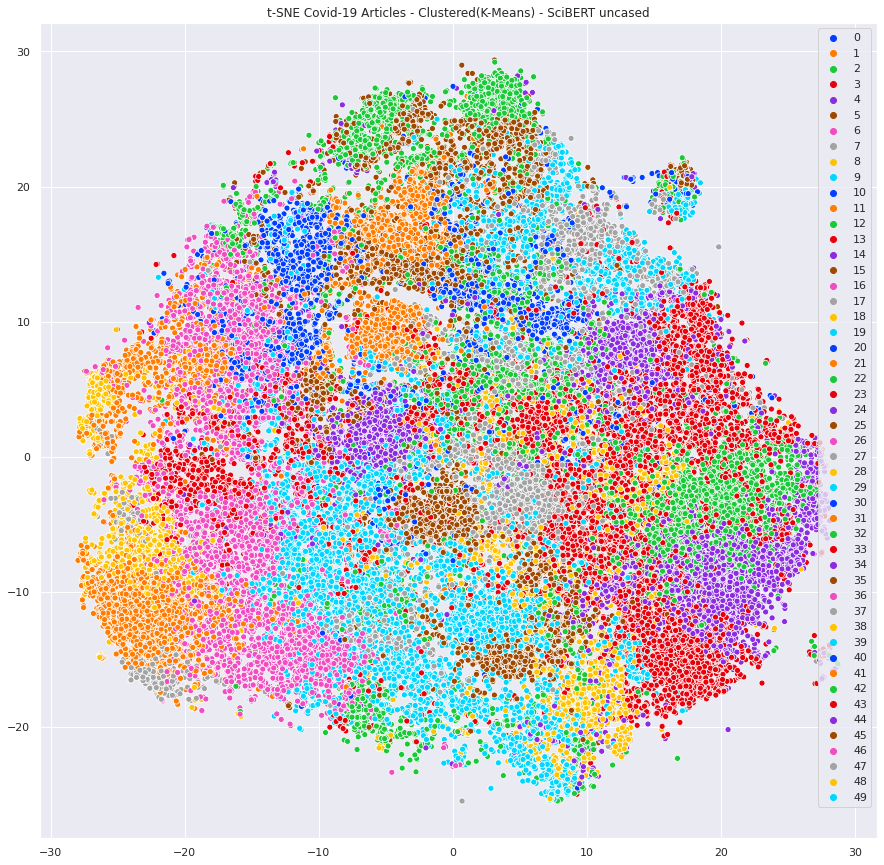

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered(K-Means) - SciBERT uncased")
# plt.savefig("plots/t-sne_covid19_label_TFID.png")
plt.show()

In [77]:
import plotly.graph_objects as go

fig = go.Figure()

plot_size = 10000

fig.add_trace(go.Scatter(
    x=X_embedded[:plot_size,0],
    y=X_embedded[:plot_size,1],
    mode="markers",
    marker=dict(color=y[:plot_size],colorscale='Viridis'),
    hovertext=X_title[:size]
    
#     template="plotly"
#     fillcolor =y
))

fig.update_layout(height=1000,title_text="Hover over the points to see the text")

fig.show()

In [1]:
import faiss     # make faiss available
import numpy as np

xb = np.load('ques_bert.npy')


In [2]:
d = 1024
index = faiss.IndexFlatL2(d)   # build the index
print(index.is_trained)
index.add(xb)                  # add vectors to the index
print(index.ntotal)

True
1029449


In [ ]:
k = 5                          # we want to see 4 nearest neighbors
D, I = index.search(xb[:20], k) # sanity check
# print(I)
# print(D)

In [ ]:
for i in I:
    for j in i:
        print(X_title[j])
    print("================")

In [15]:
raw_text = ' '.join(list_a)

In [16]:
from collections import Counter 
split_it = raw_text.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(100) 
  
print(most_occur) 

[('the', 4735983), ('of', 2926921), ('is', 2715480), ('a', 2523191), ('I', 2398518), ('to', 2385625), ('and', 2007651), ('that', 1858266), ('=', 1263740), ('in', 1186220), ('for', 1032181), ('be', 902046), ('this', 868673), ('it', 678320), ('with', 647476), ('have', 626753), ('are', 579790), ('+', 552743), ('we', 526687), ('if', 522424), ('on', 517442), ('not', 508368), ('can', 505475), ('an', 480561), ('but', 456457), ('by', 427591), ('as', 426300), ('there', 393142), ('how', 365987), ('then', 359251), ('&amp;', 354050), ('-', 353798), ('0', 336593), ('\\in', 327443), ('The', 323960), ('or', 306633), ('where', 306375), ('which', 305756), ('am', 305239), ('A', 304953), ('Let', 304674), ('x', 298739), ('know', 295842), ('from', 295780), ('all', 294887), ('such', 286072), ('1', 284134), ('would', 280132), ('at', 271171), ('function', 266192), ('so', 265978), ('any', 265893), ("I'm", 262700), ('do', 256052), ('If', 255152), ('find', 249938), ('some', 248635), ('my', 247606), ('one', 23339

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(raw_text)

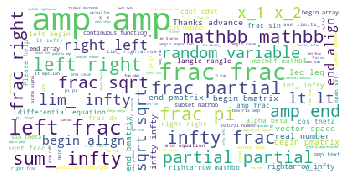

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)